In [41]:
#nba api
from nba_api.stats.endpoints import playercareerstats

#data transform
import pandas as pd

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns

#file
import os


In [29]:
# primary key for each player
dict_players = {"201142": "Kevin Durant",
 "203507": "Giannis Antetokounmpo",
 "1629029": "Luka Doncic",
 "203954": "Joel Embiid",
 "1630162": "Anthony Edwards",
 "203999": "Nikola Jokic",
 "2544": "LeBron James",
 "76003": "Kareem Abdul-Jabbar",
 #}"893": "Michael Jordan",
 "1628369": "Jayson Tatum",}

In [30]:
df_union = []

for Id in dict_players:
    career = playercareerstats.PlayerCareerStats(player_id= Id)

    df = career.get_data_frames()[0]

    df["Jogadores"] = dict_players[Id]
    
    df_union.append(df)

In [31]:
df = pd.concat(df_union)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


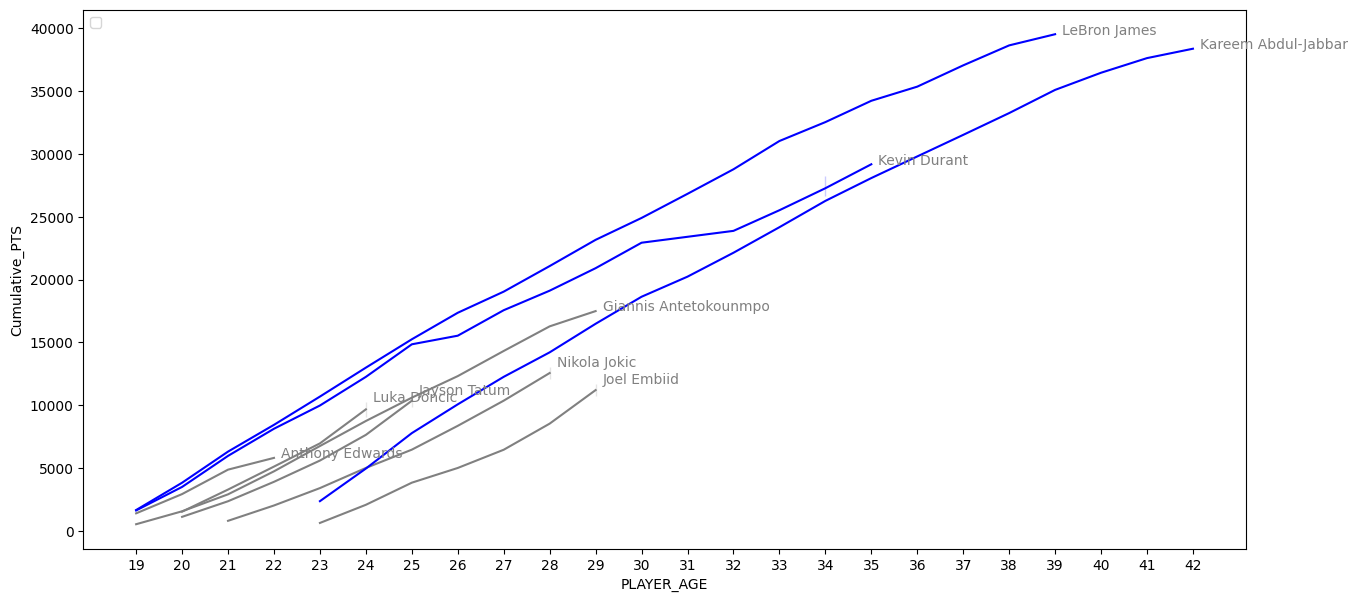

In [34]:

# Crie uma nova coluna para a soma acumulada
df['Cumulative_PTS'] = df.groupby('Jogadores')['PTS'].cumsum()

# Identifique os jogadores com mais pontos
top_players = df.groupby('Jogadores')['Cumulative_PTS'].max().sort_values(ascending=False).head(3)

# Crie um gráfico de linha usando seaborn
plt.figure(figsize=(15, 7))

# Use uma paleta condicional para definir a cor dos jogadores
palette = {player: 'blue' if player in top_players else 'gray' for player in df['Jogadores'].unique()}

# Crie um gráfico de linha usando seaborn
sns.lineplot(x="PLAYER_AGE", y="Cumulative_PTS", data=df, hue="Jogadores", palette=palette, legend=False)

# Defina os eixos x com valores inteiros
min_age = df['PLAYER_AGE'].min()
max_age = df['PLAYER_AGE'].max()
plt.xticks(range(int(min_age), int(max_age) + 1))

# Adicione o nome do jogador na ponta do gráfico para todos os jogadores
for player in df['Jogadores'].unique():
    last_point = df[df['Jogadores'] == player].iloc[-1]
    plt.annotate(player, (last_point['PLAYER_AGE'], last_point['Cumulative_PTS']), textcoords="offset points", xytext=(5, 0), ha='left', color="grey")

# Adicione uma legenda apenas para os top 3 jogadores
handles, labels = plt.gca().get_legend_handles_labels()
top_players_legend = [(handles[i], labels[i]) for i, label in enumerate(labels) if label in top_players]
plt.legend(*zip(*top_players_legend), loc='upper left')

# Mostre o gráfico
plt.show()


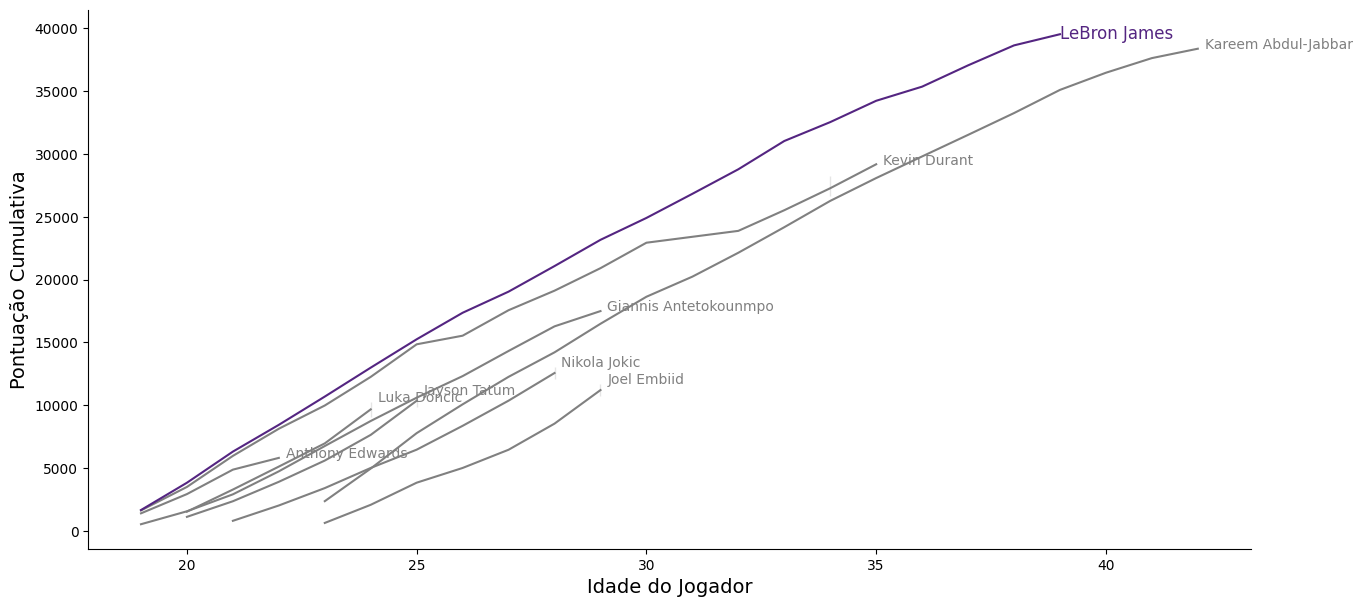

In [58]:
df['Cumulative_PTS'] = df.groupby('Jogadores')['PTS'].cumsum()

top_players = df.groupby('Jogadores')['Cumulative_PTS'].max().sort_values(ascending=False).head()

plt.figure(figsize=(15, 7))

palette = {player: '#542581' if player == top_players.index[0] else 'gray' for player in df['Jogadores'].unique()}

sns.lineplot(x="PLAYER_AGE", y="Cumulative_PTS", data=df, hue="Jogadores", palette=palette, legend=False)

top1_label = top_players.index[0]
last_point_top1 = df[df['Jogadores'] == top1_label].iloc[-1]
plt.text(last_point_top1['PLAYER_AGE'], last_point_top1['Cumulative_PTS'], top1_label, color='#542581', fontsize=12, ha='left', va='center')

sns.despine()

plt.xlabel('Idade do Jogador', fontsize=14)
plt.ylabel('Pontuação Cumulativa', fontsize=14)


for player in df['Jogadores'].unique():
    if top1_label != player:
        last_point = df[df['Jogadores'] == player].iloc[-1]
        plt.annotate(player, (last_point['PLAYER_AGE'], last_point['Cumulative_PTS']), textcoords="offset points", xytext=(5, 0), ha='left', color="grey")
    else:
        next
        
plt.savefig(os.path.join(os.getcwd(), 'grafico_pontos_cumulativos_nba.png'))

plt.show()
